# [실습] 프로젝트 : Tip 데이터 분석하기

### Tip 데이터셋에서 가장 높은 Tip을 받기 위한 전략 짜기

### 학습 목표
- 각 테이블 별로 전체 금액, 팁 금액, 성별 등의 정보가 담겨있는 Tip 데이터셋을 자세히 살펴본다.
- 데이터를 pandas, numpy, matplotlib 등의 패키지로 다루는 데에 익숙해진다.
- 각 Column별로 Tip이 높아지는 경향성을 찾아보며 어떤 특징의 테이블에 언제 가야 더 많이 받을 수 있는지 분석해본다.

---

## Contents

#### 1. [데이터 분석 준비하기]()

#### 2. [데이터셋 뜯어보기]()

#### 3. [가설을 세우고 그에 따라 세부 분석해보기]()
- 가설 : 테이블의 인원수를 나타내는 `size` 컬럼은 tip을 결정짓는 중요한 요소일 것이다

---

# 1. 데이터 분석 준비하기

### Import Modules

데이터 분석에 필요한 module을 import 해 봅니다.    
지금까지 배웠던 numpy, pandas, matplotlib과 함께 또다른 시각화 툴인 seaborn 까지 사용해 보겠습니다.

In [1]:
# numpy
import numpy as no

# pandas
import pandas as pd

# seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

이번 데이터셋은 데이터 시각화 패키지인 seaborn 패키지 안에 포함되어 있습니다.     

- seaborn 공식 홈페이지 : http://seaborn.pydata.org/


seaborn은 간단한 데이터셋으로 여러 실험을 해볼 수 있도록 샘플 데이터셋을 제공합니다.    
제공되는 데이터셋은 다음 함수로 확인할 수 있습니다.

In [2]:
# 빨간 warning message를 보고싶지 않다면
import warnings
warnings.filterwarnings('ignore')

In [3]:
# seaborn 데이터 살펴보기
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

비행 데이터를 담은 `flights`, 붓꽃 데이터를 담은 `iris` 등 여러가지 데이터가 있네요.    
이 중 우리가 오늘 사용해 볼 데이터셋은 Tip 데이터입니다. `sns.load_dataset("tips")` 으로 데이터셋을 가져와 보겠습니다.    

In [4]:
# 데이터 불러오기
# pd.read_csv('tips.csv')
data = sns.load_dataset("tips")
tips = data
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


총 244개의 행과 7개의 열로 이루어져 있군요.     

각 컬럼에 대한 세부 내용은 다음과 같습니다.    
- `total_bill` : 테이블의 전체 지불 금액
- `tip` : 팁으로 낸 금액
- `sex` : 웨이터의 성별
- `smoker` : 손님의 흡연 여부
- `day` : 요일
- `time`  : 시간
- `size` : 테이블 인원수

In [5]:
# info() 로 데이터 한 눈에 확인하기
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


이번에도 결측치 먼저 확인해보겠습니다.

In [6]:
# 결측치 개수 확인하기
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

다행히 결측치는 아무것도 없군요! 그렇다면 바로 진행해보도록 하겠습니다.

### `tip_rate` 컬럼 추가
`tip`을 `total_bill`로 나눈 `tip_rate` 컬럼을 새로 만들어보겠습니다.

In [7]:
# 팁 비율 컬럼 추가하기
tips['tip_rate'] = round(tips['tip']/tips['total_bill']*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


---

# 2. 데이터셋 뜯어보기
본격적으로 데이터셋을 하나하나 뜯어보도록 합니다. 데이터를 완벽하게 이해해야 원하는 결론도 낼 수 있다는 점을 잊지 마세요!

### (1) `sex` : 웨이터의 성별

성별은 어떤 데이터로 이루어져 있고, 각 데이터는 몇 개씩 있을까요?    



먼저 pandas의 `groupby` 함수를 이용해서 확인해보겠습니다.   

In [8]:
# 웨이터의 성별 값 확인하기
tips.groupby('sex').sum()
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

위 결과는 **Series**의 데이터 자료형으로 표현된 것입니다.

위 형태를 pandas의 DataFrame으로 보고싶다면 `reset_index`를 활용해서 index를 만들어 주면 됩니다.

In [9]:
# 성별을 pandas Dataframe 형식으로 보기 (reset index를 통해 가능)
sex_count = tips.groupby('sex').size().reset_index(name="counts");
sex_count

,sex,counts
0,Male,157
1,Female,87


다음은 그래프로도 확인해 보겠습니다.     

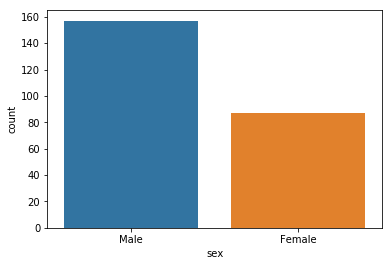

In [10]:
# 그래프로 성별 확인해보기
sns.countplot(data=tips, x = 'sex')
plt.show()

정확한 비율이 궁금하다면 다음과 같이 계산해볼 수 있죠!

In [11]:
print("Male   ", "{:.1f}%".format(sex_count.loc[0, "counts"] / len(tips) * 100))
print("Female ", "{:.1f}%".format(sex_count.loc[1, "counts"] / len(tips) * 100))

Male    64.3%
Female  35.7%


### (2) `smoker` : 손님의 흡연 여부

smoker의 데이터 개수는 이제 간단하게 확인할 수 있겠습니다.

In [12]:
# groupby 를 활용해 흡연 여부 데이터 프레임 형식으로 보기
smoker_count = tips.groupby("smoker").size().reset_index(name='counts')
smoker_count

,smoker,counts
0,Yes,93
1,No,151


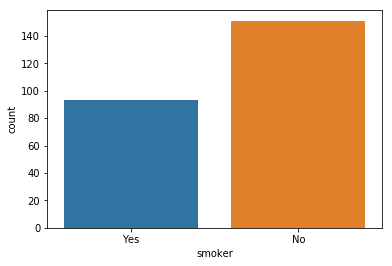

In [13]:
# 데이터 시각화해보기 
sns.countplot(data=tips, x = 'smoker')
plt.show()

### (3) `day`, `time` : 요일, 시간

이번에는 day와 time 별로 데이터 상황을 살펴보겠습니다.    


여러 값이 있는 데이터를 살펴보는 것은 `pivot_table`를 활용하면 간단합니다.     
`pivot_table`에서 데이터의 개수를 세기 위해 `counts`라는 컬럼을 만들어주겠습니다. 

In [14]:
# counts 컬럼에 동일하게 1 값을 넣어주기
tips["counts"] = 1
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,1
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,1
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,1
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,1
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,1


이제 `pivot_table`을 counts에 대한 sum(총합)을 이용하면 간단하게 각 시간/요일 별 데이터 수를 확인할 수 있겠죠!     

In [15]:
# index 는 time 으로, columns 는 day 로 설정하여 피봇 테이블 만들기 
# margins = True하면 ALL row가 생성됨
pt = tips.pivot_table("counts", index = 'time', columns = 'day', aggfunc = sum, margins = True)
pt.head()

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61.0,7.0,NaN,NaN,68
Dinner,1.0,12.0,87.0,76.0,176
All,62.0,19.0,87.0,76.0,244


In [16]:
# 위 경우에는 counts칼럼이 있어서 counts로 sum계산했지만, 별도의 컬럼 없을때는
# values 아무거나 설정하고, aggfunc를 count로 설정
tips.pivot_table(index='time', columns = 'day', values = 'tip', aggfunc = 'count')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61.0,7.0,NaN,NaN
Dinner,1.0,12.0,87.0,76.0


빈 값으로 나타난 것은 데이터가 없기 때문입니다. 0으로 채워주고, 데이터 또한 정수형으로 바꿔주도록 하겠습니다.      

In [17]:
# 빈 값은 0으로 채워주고 정수형으로 형 변환해주기
pt.fillna(0).astype('int64')

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


In [18]:
# 비율 확인하기
pt.iloc[-1][-1]
(62/244)*100

25.40983606557377

In [19]:
# 비율 확인하기
# 금요일의 방문 비율을 출력하는 코드를 완성하세요! (round 3)
# 정답 : 7.787 
X=tips.pivot_table('tip',index='time',columns='day',aggfunc='count',margins=True).fillna(0).astype('int')
friday_ratio= round(X.iloc[-1]['Fri']/X.iloc[-1][-1]*100,3)
print('금요일의 방문 비율:',friday_ratio,'%')
# 모든 포인트의 비율을 저장하는 피봇 테이블을 출력해 보세요.
print((X/X.iloc[-1][-1]*100).round(3))

금요일의 방문 비율: 7.787 %
day      Thur    Fri     Sat     Sun      All
time                                         
Lunch   25.00  2.869   0.000   0.000   27.869
Dinner   0.41  4.918  35.656  31.148   72.131
All     25.41  7.787  35.656  31.148  100.000


그래프로도 확인을 해보죠. 

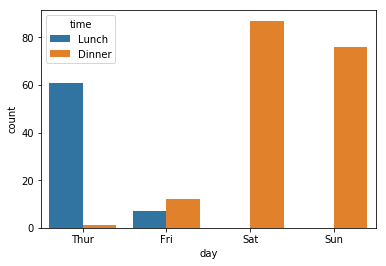

In [20]:
# 그래프로 시각화해보기
sns.countplot(data = tips, x = 'day', hue = 'time')
plt.show()

### (4) `size` : 테이블 인원수

size는 테이블 인원수를 나타냅니다.   

테이블 인원 수에 따른 Tip 과 Total Bill 값을 시각화를 통해 확인해보도록 하겠습니다.

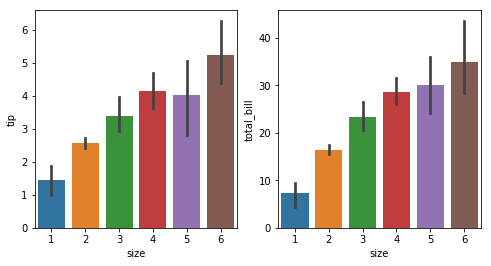

In [21]:
# subplot 사용하여 1개 행, 2개 열로 두개의 컬럼 동시에 시각화하기 
# 막대는 표준편차, 신뢰도와 관련있음
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(ax= ax[0], data=tips, x = 'size', y = 'tip')
sns.barplot(ax=ax[1], data=tips, x = 'size', y = 'total_bill')
fig.show()

잠깐! 여기서 그래프의 색상을 바꿀 수 있는 방법을 소개합니다.    
    
seaborn은 다양한 color palette를 제공하므로, 원하는 것을 골라서 사용할 수 있습니다. 
- https://seaborn.pydata.org/generated/seaborn.color_palette.html    

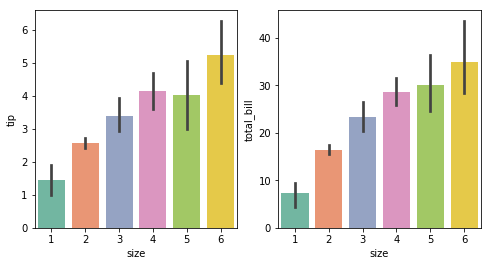

In [22]:
sns.set_palette("Set2")
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(ax= ax[0], data=tips, x = 'size', y = 'tip')
sns.barplot(ax=ax[1], data=tips, x = 'size', y = 'total_bill')
fig.show()
# sns.set_palette("Paired")
#sns.set_palette("husl")

pallete를 `husl`로 설정하면 그래프가 어떻게 바뀔까요?

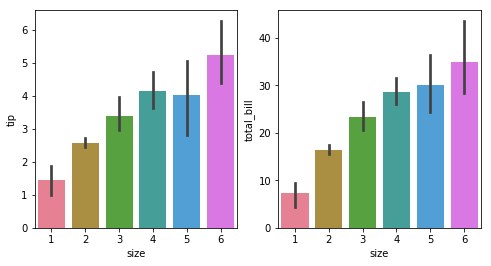

In [23]:
# 그래프 색상 바꿔서 다시 출력해보기 
sns.set_palette("husl")
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(ax= ax[0], data=tips, x = 'size', y = 'tip')
sns.barplot(ax=ax[1], data=tips, x = 'size', y = 'total_bill')
fig.show()

#### size별 데이터 개수는 어떨까?

size별 데이터는 몇 개씩 있을까요? 확인해봅시다.

In [24]:
# 테이블 인원수 데이터 개수 확인해보기
tips.groupby('size').size()

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

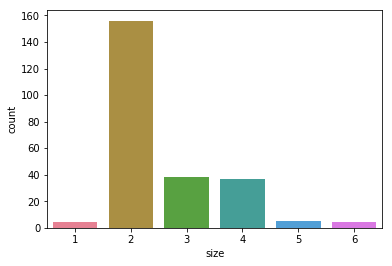

In [25]:
# 확인한 데이터 개수 시각화해보기
sns.countplot(data=tips, x = 'size')

1인~6인 테이블이 존재하지만, 2인 테이블이 가장 많은 것을 확인할 수 있습니다.     

---

# 3. 가설을 세우고 그에 따라 세부 분석해보기

지금까지 데이터를 어느정도 살펴보았으니, 이제 원하는 목표를 위해 가설을 세운 후 세부적으로 분석을 해보겠습니다.     

## 가설 : 테이블의 인원수를 나타내는 `size` 컬럼은 tip을 결정짓는 중요한 요소일 것이다

앞서 데이터를 살펴보면서 `size`가 `total_bill`과 `tips`를 결정짓는 중요한 요소임을 확인하였습니다.     
그렇다면 실제로 그런지 조금 더 구체적으로 살펴보죠!

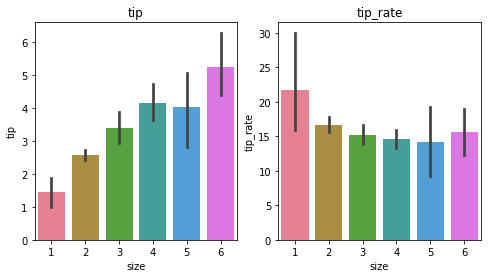

In [26]:
# size 에 따른 tip, tip_rate 그래프 시각화하기
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(ax= ax[0], data=tips, x = 'size', y = 'tip')
ax[0].set_title('tip')
sns.barplot(ax=ax[1], data=tips, x = 'size', y = 'tip_rate')
ax[1].set_title('tip_rate')
fig.show()

#### 그렇다면 `total_bill`과 `tip_rate`의 관계는 어떨까?

`total_bill`과 `tip_rate`의 관계를 확인할 수 있는 그래프도 한 번 확인해보겠습니다.    

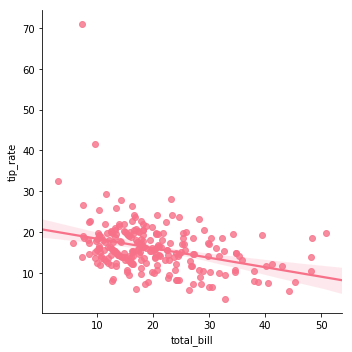

In [27]:
# order=1 인 경우: 1차 함수
#lmplot은 산포도
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=1)
plt.show()

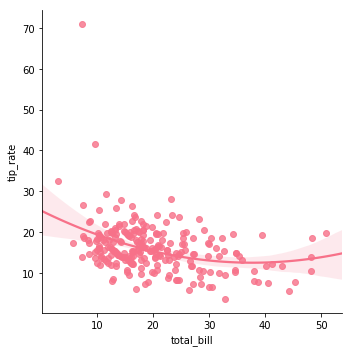

In [28]:
# order=2 인 경우: 2차 함수
sns.lmplot(data=tips, x="total_bill", y="tip_rate", fit_reg=True, order=2)
plt.show()

어떤가요? 같은 그래프이지만 추세선은 다르게 나타납니다.    

#### 이상치(Outlier)를 살펴보자

위 그래프를 통해 `total_bill`과 `tip_rate`는 반비례하는 경향을 가지는 것을 확인할 수 있습니다.    

또 한 가지 흥미로운 점은, 혼자서 엄청 떨어져 있는 특이한 tip_rate(70%이상, 40%이상) 가 있다는 점입니다. 
이를 시각화를 통해 확인해보겠습니다.

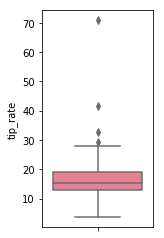

In [29]:
# 시각화로 이상치 확인해보기
# 이상치는 boxplot사용
# box내부 선은 중앙값, 위아래는 Q3, Q1 (75%, 25%)
# 세로선은 IQR*1.5
plt.figure(figsize=(2,4))
sns.boxplot(data=tips, y= 'tip_rate')

박스플롯을 그리면 데이터의 분포가 나타납니다.     

이상치를 어떻게 처리하느냐는 상황에 따라, 도메인에 따라 달라질 수 있습니다. 박스플롯에 나타나는 모든 데이터포인트를 삭제할수도, 일부분을 삭제할수도 있습니다. 저희는 이상치 중에서도 혼자 가장 멀리 떨어져있는 70% 이상의 데이터포인트를 확인해보겠습니다.

In [30]:
# 70% 이상의 팁 비율(이상치) 확인하기
tips[tips['tip_rate']>=70]

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03,1


가장 멀리 떨어져있는 위 행만 삭제를 하고 진행해보도록 하겠습니다. 

 
index를 확인했으니, pandas의 `drop` 함수로 간단히 제거할 수 있습니다

In [31]:
# drop 함수로 이상치 제거하기
tips.drop(172, inplace=True)
tips.iloc[170:175]

,total_bill,tip,sex,smoker,day,time,size,tip_rate,counts
170,50.81,10.00,Male,Yes,Sat,Dinner,3,19.68,1
171,15.81,3.16,Male,Yes,Sat,Dinner,2,19.99,1
173,31.85,3.18,Male,Yes,Sun,Dinner,2,9.98,1
174,16.82,4.00,Male,Yes,Sun,Dinner,2,23.78,1
175,32.90,3.11,Male,Yes,Sun,Dinner,2,9.45,1


이제  다시 분포를 확인해봅시다. `hue` 인자에 `time`을 넣어 확인해 보겠습니다.

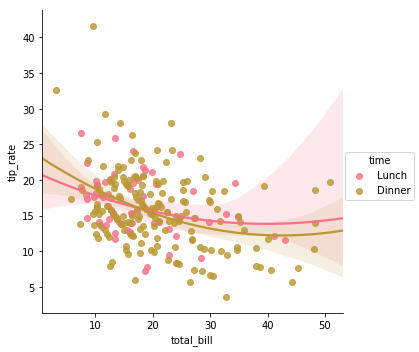

In [32]:
# 이상치 제거 이후 분포 다시 확인해보기 
sns.lmplot(data=tips, x='total_bill', y='tip_rate', hue='time', order=2)
plt.show()

이제 전체적으로 혼자 엄청 떨어진 데이터 없이 정상적인 데이터 분포를 확인할 수 있고, 반비례 관계를 가지는 것을 확인했습니다.

#### 그렇다면, `tip_rate`가 작은  큰 테이블이 좋은가, 아니면 `tip_rate`가 큰 작은 테이블이 좋은가?
이런 질문을 던져보지 않을 수 없겠죠! 바로 확인해봅시다.

먼저 우리가 원하는 컬럼인 `size`를 기준으로 `groupby`를 한 후, `describe` 함수를 이용해서 간단한 통계량을 한 번에 확인해보겠습니다.    
`describe`는 전체 데이터에 대한 통계량을 한 번에 볼 때 유용합니다.     

In [33]:
# describe 함수로 통계량 확인해보기
tips.groupby('size').describe()['tip']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2,155.0,2.565742,0.966660,1.00,2.0000,2.500,3.1250,5.85
3,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


이런 결론을 내릴 수 있습니다.
> **size가 큰 테이블은 작은 테이블보다 `tip_rate`가 작더라도 `tip` 금액은 클 것이다** 

### [가설] size는 tip을 결정짓는 가장 중요한 요소이다 : 결론

  
`tip_rate`가 높더라도 `size`가 작다면 총 금액이 작아서, 비율로 환산할 시 실제로 받는 절대적인 tip 금액은 작다.   
그러므로, 일단은 **1순위로 size가 큰 테이블을 잡는 것이 유리하다.**

### 결론을 낸 후의 고찰

하지만, size를 다시 한 번 상기해보면 어떤가요?

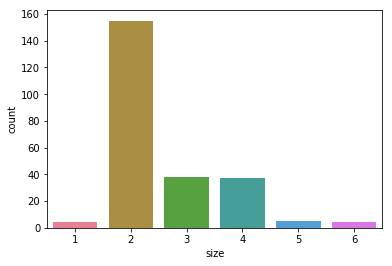

In [34]:
# size 다시 한번 시각화해보기
sns.countplot(data=tips, x = 'size')

실제로 size는 2명인 테이블이 154개로 가장 압도적이고, 1명이거나 5명, 6명인 테이블은 각각 전체의 5%도 안되는 개수를 가집니다.    

[가설2] 